# 3 Step Process to Analyzing Your Data (General case)
1. Define your goal, why this matters, your target variable, initial hypotheses (write these down)
2. Get to know your data: obtain a 10,000 ft view of your data before diving in (write down what you learn/discover)
3. Answer your initial hypotheses questions with visuals and statistics (write down takeaways as you go)

## Step 1: Define your goal. What's the impact? Who benefits? Why does this matter? 
- Take *lots* of written or typed notes here. 
- What, exactly, are you seeking to understand?
- Define your target variable. Does one exist in your dataset?
- Define your initial hypotheses: literally write them down
    - Are the stakeholders hoping to confirm or deny something already? That's a good start.
    - What initial hunches do you have? How could you confirm or deny them?
    - Are there industry based hunches you can confirm or deny?
    - If you have data from your industry, how does your dataset compare?
    - Based on the columns you have, do you see anything you *know* you need to look at?
- Define your Minimum Viable Product (MVP)
    - How do you know when you're done?
    - How do you know when you've got something to deliver?
    - If something seems interesting but out of scope, add it to your backlog and get back to the heart of the matter

### How to Generate Initial Hypotheses  

Think and write down your thoughts

![](hypothesis_generation.png)

### Defining Your Minimum Viable Product (MVP)

The real MVP is producing insight and takeaways stakeholders can use to improve their decision making

What would a Minimum Viable Product look like? You likely won't have 6 months to produce answers.

![](mvp.png)

## Step 2: Get to know your data at a high level
- *Dump out all your legos and take inventory of what you have*
- Take lots of written or typed notes as you move through these steps)
- Hunt down a data dictionary that explains what each column of your data is or represents.
    - This may mean talking to people
    - This may mean having coffee w/ someone from accounting to pick their brain
- Determine if there's any columns needing cleaning or a change in data type
- Hunt for any nulls or missing data. Write down how you handle them. There's no one right answer.
- What's the distribution of your target variable? What about your most interesting variables?

![](storytelling.webp)

## Step 3: Answer your initial hypotheses with visuals and statistics
- Always write down your takeaways as you learn or reveal them
- Use visuals, descriptive stats, and inferential stats to answer your hypotheses
- Start with one hypothesis at a time.
- Visualize and get stats on the population
- Start making subgroups to compare subgroups to the population and subgroups to subgroups
- Focus on getting the biggest bang for your buck rather than counting toenails on an ant.

![](descriptive-and-inferential-statistics.jpeg)

### Explore Relationships Between Variables and the Target Variable
![](hypothesis.jpeg)

# 3 Step Process to Data Analysis (Specific case with HR Attrition Data)
1. Define your goal, why this matters, your target variable, initial hypotheses (write these down)
2. Get to know your data: obtain a 10,000 ft view of your data before diving in (write down what you learn/discover)
3. Answer your initial hypotheses questions with visuals and statistics (write down takeaways as you go)

## Step 1 is to define our goal, why it matters, identify target variable, state the hypothesis

- Manager shows up and says **"Hr gave us this data and wants to know why people are leaving?"**
- Our goal: What are the drivers of attrition?
- Why does this matter: 
    - losing experience to competition
    - decrease labor costs 
    - Productivity
    -  (You can also google search) Replacing an employee can cost between 50%-200% of their salary. 
        - you can use this information to make an arguement or form a stronger hypothesis. 
    - Current team picking up slack. Lower morale, snowball effect of attrition, etc. 

- What is our target variable: Attrition itself
- What are some interesting variables that you think might drive attrition (initial hypotheses)
    - Year since last promotion: relationship between year since promotion and attrition? 
    - Overtime: What's the relationship between overtime and attrition?
    - Job/Relationship satisfaction (Job culture)
    - Years in role
    - Monthly Income
    - Marital status or other demographic info
- What would a minimally viable product look like? == First Draft (*Second draft makes it look like you know what you were doing all alone*)
    - What target rate are we hitting with churn? 
        - Look at correlations 
    - Now, what tells the biggest stories?
        - Get an answer
        - define a Deliverable : could be an email with a few sentences and recommendations.
        - Could be an ML model for engineering team. 
        - Would be a slideshow
    - Take surveys like job satisfaction and work/life balance - how honest are they? Should we believe them?
- Always soruce data: 

## Step 2: Get to know the Data at a high level
- Histograms and .value_counts of our target variable and variables of interest
- Determine if we can have any missing values
- General guideline: if you're comparing two variables:
    - if looking at variables x and y we need to operate on the "train" dataset. 
    - if youre doing any ML, split the data before exploring.(i.e looking at multiple variables together. )

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("attrition.csv")

In [3]:
# print out the first few records

df.head(2).T

,0,1
Age,41,49
Attrition,Yes,No
BusinessTravel,Travel_Rarely,Travel_Frequently
DailyRate,1102,279
Department,Sales,Research & Development
DistanceFromHome,1,8
Education,2,1
EducationField,Life Sciences,Life Sciences
EmployeeCount,1,1
EmployeeNumber,1,2


<AxesSubplot:>

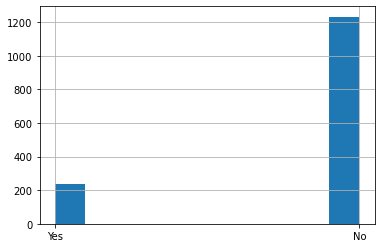

In [4]:
# Our target variable is attrition so lets
# get a value_count or histogram

df.Attrition.hist()

In [6]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [9]:
# what is the proportion of attrition?
df[df.Attrition == "Yes"].shape[0] / df.shape[0] * 100

# percent :

16.122448979591837

- search a healthy attrition for company,
- if a healthy attrition is 10% 
- Takeaway : This company has 60% more attrition than what is 
- statistically healthy (16 = 60% more than 10)

In [10]:
# we can run df.info() to check for nulls and other dtypes
df.info()

# All data-types are clean and at first glance no 
# nulls to worry about. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

- We can Quantify the cost of lost employees
- To do this : 
    - (site source)
    - Let's assume 60% of salary to replace employees


In [15]:
(df.Attrition == "Yes").sum()

237

In [14]:
# get monthly income of attrition, then multiply by 12 to get yearly sum
# then multiply by 60% to get statistically what it would cost
# to replace those people 
df[df.Attrition == 'Yes'].MonthlyIncome.sum() * 12 * .6

8168695.199999999

## Takeaways so far:
- Attrition is 60% above a 'healthy' level of 10%
- it may cost at least $8m to replace the 237 employees who left

## Step 3: Answer your initial hypotheses questions with visuals and statistics (write down takeaways as you go)

- if you were doing any ML, we would split the data and only explore the train instead of the entire dataset at this stagee
- Exploring the dataset means understanding and interogating the relationships between variables and the target
- Use descriptive statistics, visuals, hypothesis tests
    - Visualize average monthly income to attrition
    - Visualize job satisfaction to attrition
    - Sometimes a few stats can tell a story, sometimes we need a handful of charts.

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

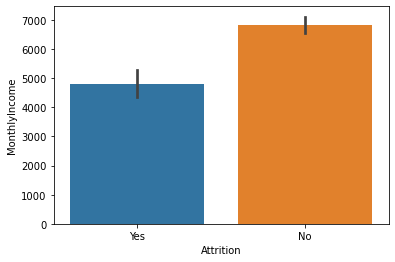

In [16]:
# barplots show average and we can specify categories
sns.barplot(x = 'Attrition', y = 'MonthlyIncome', data=df)

## Takeaway #1
- Those with a lower monthly average leave the company

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

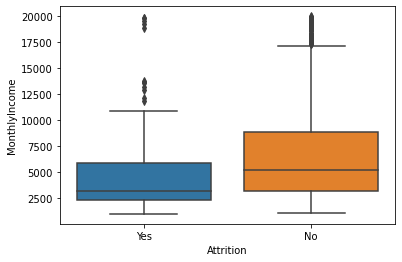

In [18]:
# boxplots show the median in the middle of the box (distribution)
# lower bound of the box is 01, upper boundd is the 3rd quartile
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)

## Takeaway #2
- Average and median and most incomes for those who left are lower than those who stayed

In [19]:
# does maritial status have anything to do with attrition
lost = df[df.Attrition == 'Yes']
kept = df[df.Attrition == 'No']

<AxesSubplot:>

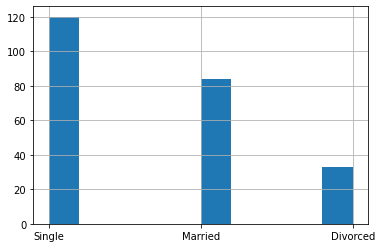

In [21]:
lost.MaritalStatus.hist()

<AxesSubplot:>

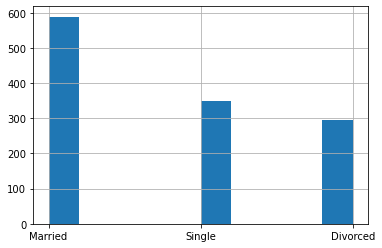

In [22]:
kept.MaritalStatus.hist()

## Takeaway #3
- Larger proportion of married employees who stay
- Larger proportion of single people who left

In [24]:
# whats the relationship between gender and attrition?
kept.Gender.value_counts()

Male      732
Female    501
Name: Gender, dtype: int64

In [26]:
501 / (kept.shape[0])
# proportion of women employees staying

0.40632603406326034

In [25]:
lost.Gender.value_counts()

Male      150
Female     87
Name: Gender, dtype: int64

In [27]:
87 / lost.shape[0]
# proportion of women employees leaving

0.3670886075949367

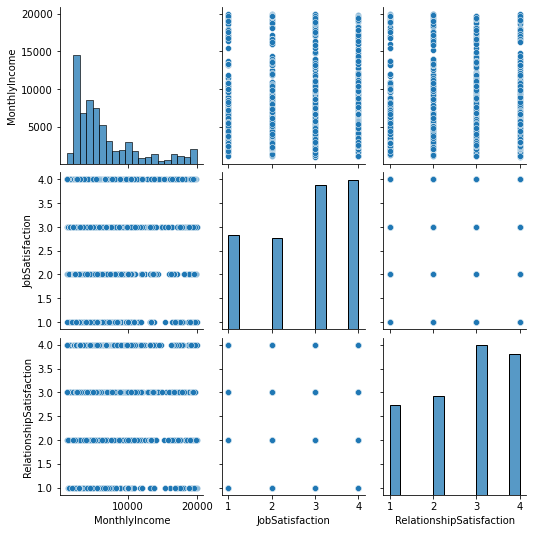

In [29]:
# this is not a good way to compare THIS TYPE of data. DONT
sns.pairplot(data=df[["MonthlyIncome","JobSatisfaction","RelationshipSatisfaction"]])

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

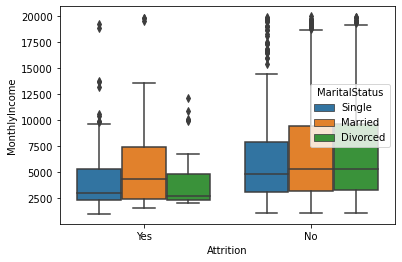

In [31]:
# use hue to get another dimension
# like using it on marital status
sns.boxplot(x='Attrition', y='MonthlyIncome',hue = "MaritalStatus", data=df)

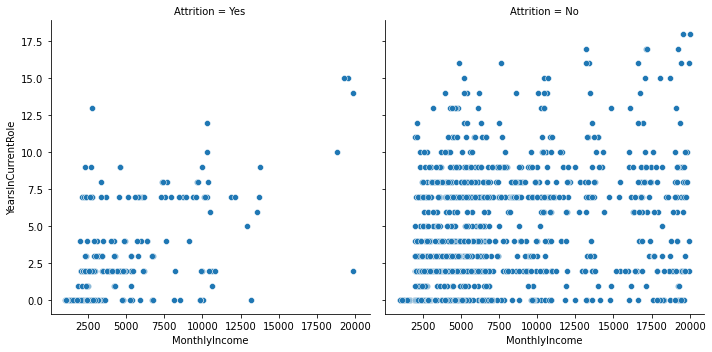

In [32]:
sns.relplot(x='MonthlyIncome', y="YearsInCurrentRole", col="Attrition", data=df)

## Takeaway #4
- People who stayed have been at the role longer than those who left
- Each point on a relplot is an individual

<AxesSubplot:xlabel='Attrition', ylabel='YearsInCurrentRole'>

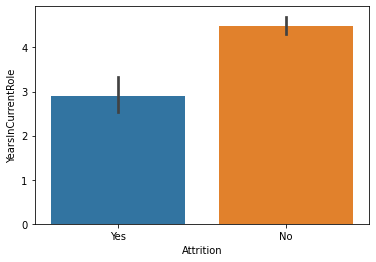

In [33]:
#bar plot shows averages

sns.barplot(x='Attrition', y="YearsInCurrentRole", data=df)

<AxesSubplot:xlabel='Attrition', ylabel='YearsInCurrentRole'>

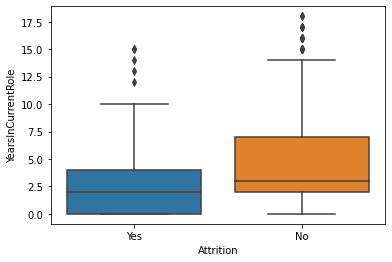

In [34]:
# box plot shows distribution and spread

sns.boxplot(x='Attrition', y="YearsInCurrentRole", data=df)

<AxesSubplot:xlabel='Attrition', ylabel='YearsSinceLastPromotion'>

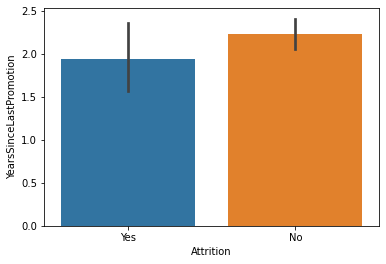

In [36]:
# box plot shows distribution and spread

sns.barplot(x='Attrition', y="YearsSinceLastPromotion", data=df)